# Fluorophore Blinking
MH, v1.4, 2021_08_13

## Lib

In [1]:
from skimage.io import imread
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import montage

## Init

In [2]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
matplotlib.rcParams['font.size'] = 14

## Paths

In [4]:
commonPath = Path('c:/Users/miros/home/work/jhi/projects/'
    'plasmonic_microscopy/data/measurements/')

In [5]:
# measurement = 'jhi213/01_2021_03_26'
# measurement = 'jhi213/04_2021_08_05'
# measurement = 'jhi213/05_2021_09_09'

# measurement = 'biocev/01_2021_05_26'
# measurement = 'biocev/02_2021_08_04'
measurement = 'biocev/03_2021_09_13'

In [6]:
input_directory = commonPath/measurement/'image_stack_128x128'

In [7]:
input_file_paths = list(input_directory.iterdir())
len(input_file_paths)

31

In [8]:
input_file_path = input_file_paths[0]

## Titles from Paths

In [9]:
def title_from_path(path):
    return (path.stem).replace('_',', ')

In [10]:
title_from_path(input_file_path)

'01, 80RG, ROI01, 647nm, 20pct, 300gain, 160nm, 100ms'

In [11]:
titles = [title_from_path(path) for path in input_file_paths]

In [12]:
titles

['01, 80RG, ROI01, 647nm, 20pct, 300gain, 160nm, 100ms',
 '02, 80RG, ROI02, 647nm, 40pct, 300gain, 160nm, 100ms',
 '03, 80RG, ROI03, 647nm, 60pct, 300gain, 160nm, 100ms',
 '04, 80RG, ROI04, 647nm, 80pct, 300gain, 160nm, 100ms',
 '05, 80RG, ROI05, 647nm, 100pct, 300gain, 160nm, 100ms',
 '06, 80RG, ROI06, 647nm, 60pct, 300gain, 160nm, 50ms',
 '07, 80RG, ROI07, 647nm, 60pct, 300gain, 160nm, 150ms',
 '08, 80RG, ROI08, 647nm, 60pct, 300gain, 160nm, 200ms',
 '09, 80RG, ROI09, 647nm, 60pct, 300gain, 160nm, 100ms',
 '10, 80RG, ROI09, 647nm, 60pct, 300gain, 160nm, 100ms',
 '11, 80RG, ROI09, 647nm, 60pct, 300gain, 160nm, 100ms',
 '12, 80RG, ROI10, 561nm, 20pct, 300gain, 160nm, 100ms',
 '13, 80RG, ROI11, 561nm, 40pct, 300gain, 160nm, 100ms',
 '14, 80RG, ROI12, 561nm, 60pct, 300gain, 160nm, 100ms',
 '15, 80RG, ROI12, 561nm, 60pct, 300gain, 160nm, 100ms',
 '16, 80RG, ROI12, 561nm, 60pct, 300gain, 160nm, 100ms',
 '17, 80RG, ROI13, 561nm, 80pct, 300gain, 160nm, 100ms',
 '18, 80RG, ROI14, 561nm, 100pc

## Load Image Stack

In [13]:
def load_image_stack(path):
    return imread(path, plugin='tifffile').astype('uint16')

In [14]:
image_stack = load_image_stack(input_file_path)

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


## Stack Properties

In [15]:
image_stack.shape

(2000, 128, 128)

In [16]:
image_stack.dtype

dtype('uint16')

In [17]:
np.min(image_stack), np.max(image_stack)

(540, 3772)

## First Image of the Stack 

In [18]:
image = image_stack[0].copy()

In [19]:
def show_image(image, cmap='plasma', title=None, hide_axis=True, figsize=(8,8)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.imshow(image, cmap)
    if hide_axis:
        plt.axis('off')
    plt.show() 

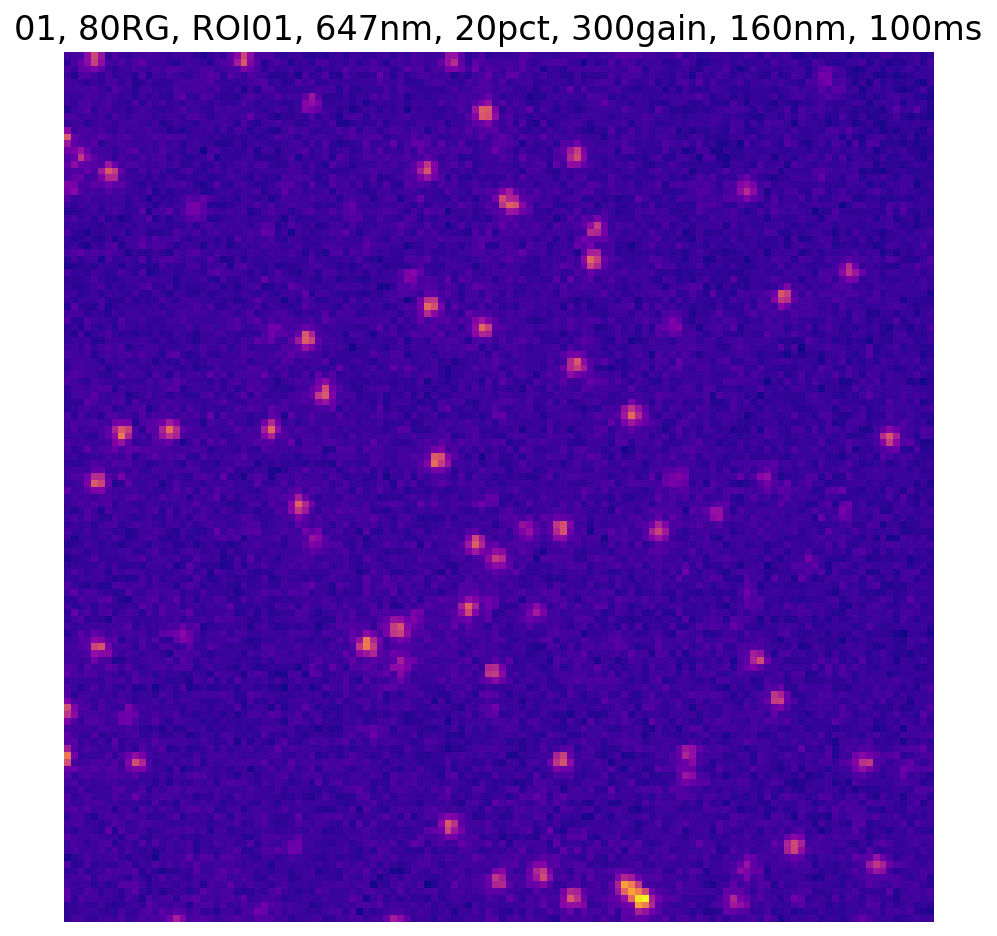

In [20]:
show_image(image, title=title_from_path(input_file_path))

## Number of Frames

In [21]:
n_frames = image_stack.shape[0]
# n_frames = 50
# n_frames = 100
# n_frames = 150
# n_frames = 300
# n_frames = 500
# n_frames = 600

## Frame Statistics

In [22]:
mean_intensity = np.array([np.mean(image_stack[i]) for i in range(n_frames)])
median_intensity = np.array([np.median(image_stack[i]) for i in range(n_frames)])
std_intensity = np.array([np.std(image_stack[i]) for i in range(n_frames)])

In [23]:
from scipy import stats

trim_mean_intensity = np.array([
    stats.trim_mean(
        image_stack[i].flatten(), proportiontocut=0.1) for i in range(n_frames)])
trim_std_intensity = np.array([
    stats.mstats.trimmed_std(image_stack[i].flatten()) for i in range(n_frames)])

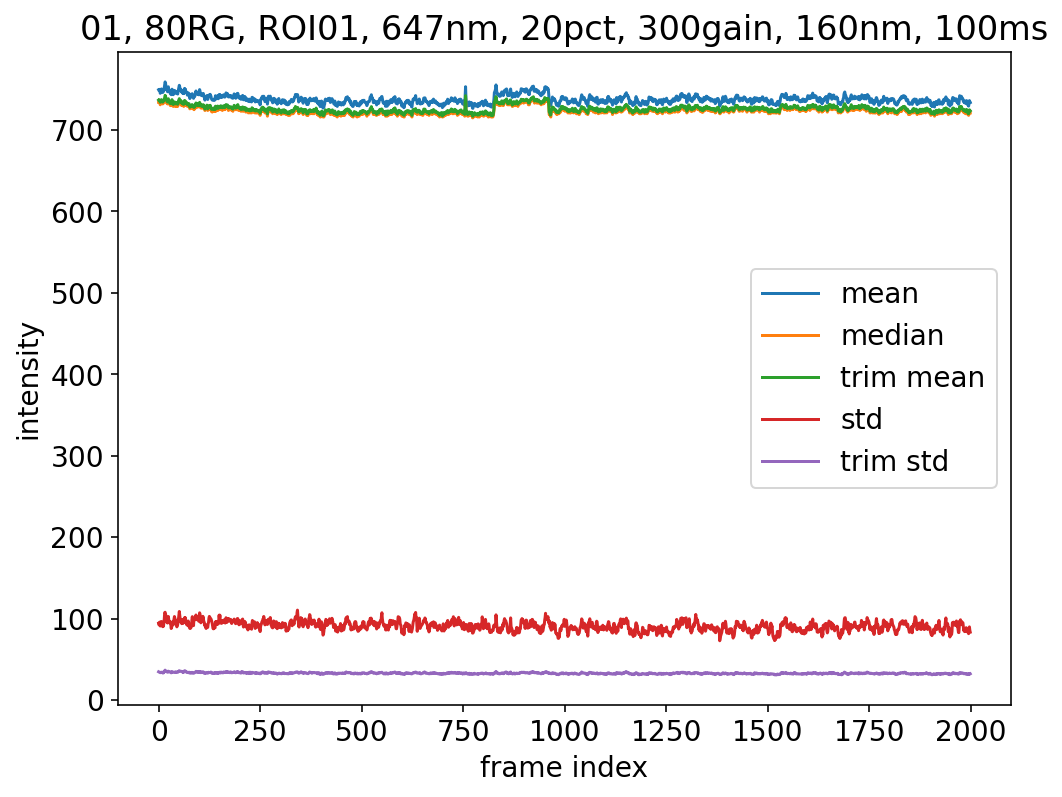

In [24]:
plt.figure(figsize=(8,6))
plt.plot(mean_intensity, label='mean')
plt.plot(median_intensity, label='median')
plt.plot(trim_mean_intensity, label='trim mean')
plt.plot(std_intensity, label='std')
plt.plot(trim_std_intensity, label='trim std')
plt.xlabel('frame index')
plt.ylabel('intensity')
plt.title(title_from_path(input_file_path))
plt.legend(loc='best')
plt.show()

## Median Frame Intensity

In [25]:
def median_image_stack(input_file_path, close_fig=False, save_fig=False):
    
#     print('Processing file: ' + input_file_path.name)
    
    image_stack = load_image_stack(input_file_path)
       
    median_intensity = [np.median(image_stack[i]) for i in range(n_frames)]
    
    # output path
    output_directory = input_file_path.parents[1]/'median_frame_intensity'
    output_directory.mkdir(exist_ok=True)
    output_file_path = output_directory/(input_file_path.stem + '.png')
        
    # plot
    plt.figure(figsize=(8,6))
    plt.plot(median_intensity, label='median')    
    plt.xlabel('frame index')
    plt.ylabel('median frame intensity')    
    plt.title(title_from_path(input_file_path))
    
    if save_fig:
        plt.savefig(output_file_path, dpi=300, bbox_inches='tight', facecolor = 'w') 
    
    if close_fig:
        plt.close(plt.gcf())
    else:
        plt.show()

In [26]:
input_file_path

WindowsPath('c:/Users/miros/home/work/jhi/projects/plasmonic_microscopy/data/measurements/biocev/03_2021_09_13/image_stack_128x128/01_80RG_ROI01_647nm_20pct_300gain_160nm_100ms.tiff')

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


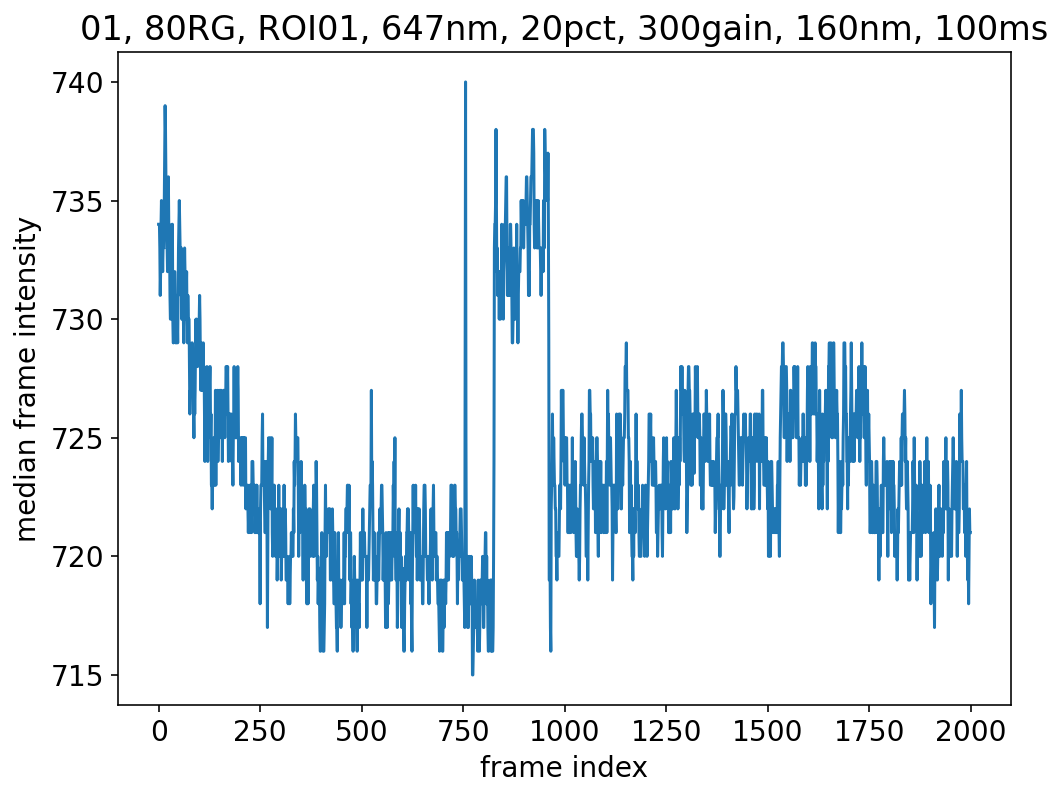

In [27]:
median_image_stack(input_file_path, save_fig=True)

In [28]:
for path in input_file_paths:
    if path.is_file() and path.suffix == '.tiff':
        median_image_stack(path, save_fig=True, close_fig=True)

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offs

## Brightest Pixel of the First Image

In [ ]:
def argmax_indices(image): 
    return np.unravel_index(np.argmax(image), image.shape)

In [ ]:
np.max(image)

In [ ]:
x_hat, y_hat = argmax_indices(image)

In [ ]:
x_hat, y_hat

In [ ]:
image[x_hat, y_hat]

## Nth Brightest Pixel of the First Image

In [ ]:
# def nth_argmax_indices(image, nth_maximum=1): 
#     return np.unravel_index( np.argsort(image.flatten())[-1 * nth_maximum], image.shape)

In [ ]:
# nth_maximum=1
# nth_maximum=13

In [ ]:
# x_hat, y_hat = nth_argmax_indices(image, nth_maximum)

In [ ]:
# x_hat, y_hat

## Brightest Pixel of the Image Stack

In [ ]:
# np.max(image_stack)

In [ ]:
# frame_hat, x_hat, y_hat = argmax_indices(image_stack)

In [ ]:
# x_hat, y_hat

In [ ]:
# image_stack[frame_hat, x_hat, y_hat]

## Intensity of the Brightest Pixel in the Stack

In [ ]:
pixel_intensity = image_stack[:n_frames, x_hat, y_hat]

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(pixel_intensity)
plt.xlabel('frame index')
plt.ylabel('intensity')
plt.title(f'intensity of the pixel ({x_hat},{y_hat})')
plt.show()

## Pixel Neighborhood 

In [ ]:
# neighborhood range
# r = 1
# r = 2
r = 3
# r = 4

In [ ]:
def get_neighborhood(image, x, y, r):
    return image[
        x-r : x+r + 1,
        y-r : y+r + 1
    ]

In [ ]:
get_neighborhood(image_stack[0], x_hat, y_hat, r)

## Montage of the Brightest Pixel Neighborhoods

In [ ]:
neighborhood_montage = montage(
    np.array([
        get_neighborhood(image_stack[i], x_hat, y_hat, r) for i in range(n_frames)]),
    padding_width=1,
    fill=0
)

In [ ]:
show_image(neighborhood_montage, title=input_file_path.name, figsize=(12,12))

## Averaged Neighborhood Intensities

In [ ]:
def get_averaged_neighborhood_intensity(image_stack, x, y, r, n_frames, av_func):
    return np.array([av_func(get_neighborhood(image_stack[i], x, y, r)) for i in range(n_frames)])

### Max

In [ ]:
max_neighborhood_intensity = get_averaged_neighborhood_intensity(
    image_stack, x_hat, y_hat, r, n_frames, np.max)

In [ ]:
plt.plot(max_neighborhood_intensity)
plt.xlabel('frame index')
plt.ylabel('intensity')
plt.title(f'max of {2*r+1}x{2*r+1} neighborhood of pixel ({x_hat},{y_hat})')
plt.show()

### Mean

In [ ]:
mean_neighborhood_intensity = get_averaged_neighborhood_intensity(
    image_stack, x_hat, y_hat, r, n_frames, np.mean)

In [ ]:
plt.plot(mean_neighborhood_intensity)
plt.xlabel('frame index')
plt.ylabel('intensity')
plt.title(f'mean of {2*r+1}x{2*r+1} neighborhood of pixel ({x_hat},{y_hat})')
plt.show()

### Std

In [ ]:
std_neighborhood_intensity = get_averaged_neighborhood_intensity(
    image_stack, x_hat, y_hat, r, n_frames, np.std)

In [ ]:
plt.plot(std_neighborhood_intensity)
plt.xlabel('frame index')
plt.ylabel('intensity')
plt.title(f'std of {2*r+1}x{2*r+1} neighborhood of pixel ({x_hat},{y_hat})')
plt.show()

### Median Filter Spike Noise Reduction

In [ ]:
from scipy import ndimage

In [ ]:
median_filter_size = 3;
median_filt_mean_neighborhood_intensity = ndimage.median_filter(
    mean_neighborhood_intensity, size=median_filter_size)

In [ ]:
plt.plot(median_filt_mean_neighborhood_intensity)
plt.xlabel('frame index')
plt.ylabel('intensity')
plt.title(f'{median_filter_size}-sample median filtered mean of {2*r+1}x{2*r+1} neighborhood of pixel ({x_hat},{y_hat})')
plt.show()

### Compare

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(pixel_intensity, label=f'pixel ({x_hat},{y_hat})')
# plt.plot(max_neighborhood_intensity, label=f'max of {2*r+1}x{2*r+1} neighborhood')
plt.plot(mean_neighborhood_intensity, label=f'mean of {2*r+1}x{2*r+1} neighborhood')
# plt.plot(std_neighborhood_intensity, label=f'std of {2*r+1}x{2*r+1} neighborhood')
plt.plot(median_filt_mean_neighborhood_intensity, label=f'{median_filter_size}-sample median filtered mean of {2*r+1}x{2*r+1} neighborhood')
# plt.plot(median_intensity, label='frame median')
plt.plot(mean_intensity, label='frame mean')
plt.legend(loc='upper right')
plt.xlabel('frame index')
plt.ylabel('intensity')
plt.title(input_file_path.name)
plt.show()

### Various Neghborhood Ranges

In [ ]:
def show_averaged_neighborhood_intensity(
    image_stack, x, y, r, n_frames, av_func_label):

        if av_func_label == 'mean':
            av_func = np.mean
        elif av_func_label == 'max':
            av_func = np.max   
    
        av_neighborhood_intensity = get_averaged_neighborhood_intensity(
            image_stack, x, y, r, n_frames, av_func)                
        
        plt.plot(av_neighborhood_intensity)
        plt.xlabel('frame index')
        plt.ylabel('intensity')
        plt.title(
            f'{av_func_label} of {2*r+1}x{2*r+1} neighborhood of pixel ({x_hat},{y_hat})')
        plt.show()

In [ ]:
for af in ['mean', 'max']:
    for i in range(4): 
        show_averaged_neighborhood_intensity(image_stack, x_hat, y_hat, i, n_frames, af)

## Thresholding

In [ ]:
threshold = 3 * trim_std_intensity

In [ ]:
plt.plot((median_filt_mean_neighborhood_intensity - median_intensity))
plt.plot(threshold)
plt.show()

In [ ]:
on_state = ( (median_filt_mean_neighborhood_intensity - median_intensity) > threshold ).astype(int)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(on_state)
plt.show()

In [ ]:
on_state[:20]

In [ ]:
import itertools

In [ ]:
blinking_statistics = [(k,len(list(v))) for k,v in itertools.groupby(on_state)]

In [ ]:
blinking_statistics

In [ ]:
np.mean([bs[1] for bs in blinking_statistics if bs[0]==1])

## Final Averaged Neighborhood Intensity

In [ ]:
output_directory = input_file_path.parents[1]/'blinking'
output_directory.mkdir(exist_ok=True)

In [ ]:
output_file_path = output_directory/(input_file_path.stem + '.png')

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(mean_neighborhood_intensity, label=f'mean of {2*r+1}x{2*r+1} neighborhood')
plt.plot(mean_intensity, label='frame mean')
plt.legend(loc='upper right')
plt.xlabel('frame index')
plt.ylabel('intensity')
plt.title((input_file_path.stem).replace('_',', '))
plt.savefig(output_file_path, dpi=300, bbox_inches='tight') 
plt.show()

### Process Folder

In [ ]:
def process_image(input_file_path, n_frames, r):
    
    print('Processing file: ' + input_file_path.name)
#     print('Path: ' + str(input_file_path))
    
    image_stack = load_image_stack(input_file_path)
    
    # brightess pixel indices of the first stack image
    x_hat, y_hat = argmax_indices(image_stack[0])    

    # mean neighborhood intensity
    mean_neighborhood_intensity = get_averaged_neighborhood_intensity(
        image_stack, x_hat, y_hat, r, n_frames, np.mean)
    
    # mean frame intensity
    mean_intensity = [np.mean(image_stack[i]) for i in range(n_frames)]
    
    # output path
    output_directory = input_file_path.parents[1]/'blinking'
    output_directory.mkdir(exist_ok=True)
    output_file_path = output_directory/(input_file_path.stem + '.png')
        
    # plot
    plt.figure(figsize=(8,6))
    plt.plot(mean_neighborhood_intensity, label=f'mean of {2*r+1}x{2*r+1} neighborhood')
    plt.plot(mean_intensity, label='frame mean')
    plt.legend(loc='upper right')
    plt.xlabel('frame index')
    plt.ylabel('intensity')
    plt.title((input_file_path.stem).replace('_',', '))
    plt.savefig(output_file_path, dpi=300, bbox_inches='tight', facecolor = 'w') 
#     plt.show()
    plt.close(plt.gcf())

In [ ]:
process_image(input_file_path, n_frames, r)

In [ ]:
input_directory = input_file_path.parent

In [ ]:
for fp in input_directory.iterdir():
    if fp.is_file() and fp.suffix == '.tiff':
        process_image(fp, n_frames, r)